## Unsupervised Learning - Clustering

### Predict the optimum number of clusters and represent it visually.


Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

Import data from sklearn datasets

In [2]:
#url = "https://bit.ly/3kXTdox"
#ir = pd.read_csv(url)

iris = datasets.load_iris()
ir = pd.DataFrame(iris.data, columns = iris.feature_names)
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
ir.shape

(150, 4)

In [4]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
ir.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
ir.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# No missing values found

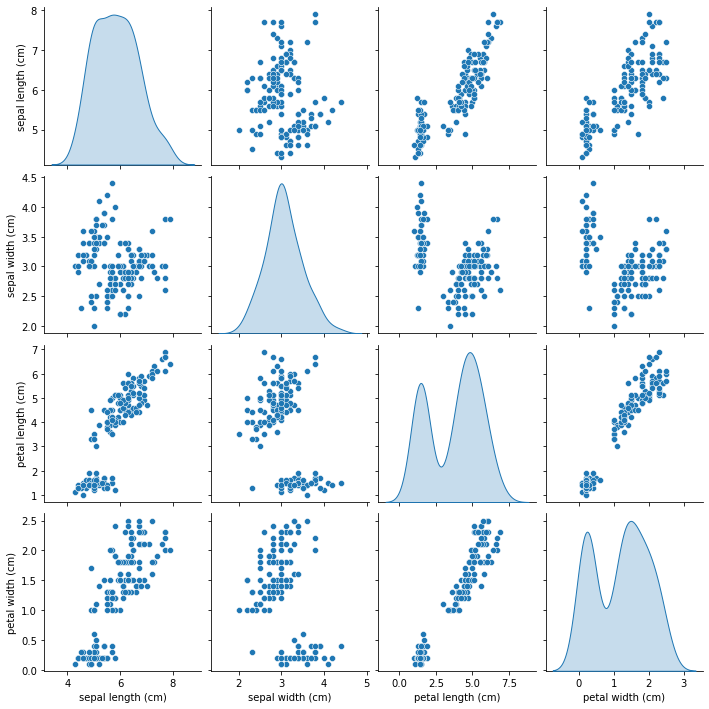

In [8]:
sns.pairplot(ir, diag_kind='kde')

In [9]:
## Based on the kde plots, we can work with 2 or 3 clusters

We do not want our algorithm to be affected by the magnitude of the variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale. One of the most common technique to do so is normalization where we calculate the mean and standard deviation of the variable.

In [10]:
##Scale the data
from scipy.stats import zscore

ir_z = ir.apply(zscore)

## K Means Clustering

#### Finding Optimal number of clusters using Elbow method:

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

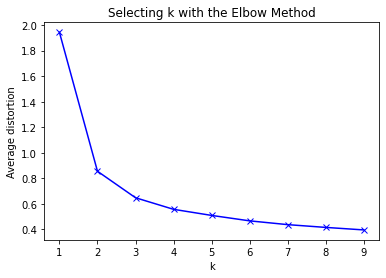

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ir)
    prediction=model.predict(ir)
    meanDistortions.append(sum(np.min(cdist(ir, model.cluster_centers_, 'euclidean'), axis=1)) / ir
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [12]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=234)

In [13]:
kmeans.fit(ir_z)

KMeans(n_clusters=3, n_init=15, random_state=234)

In [14]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [15]:
# centroids with list name 
centroid_df = pd.DataFrame(centroids, columns = list(ir_z) )
centroid_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.050220,-0.883376,0.347738,0.281527
1,-1.014579,0.853263,-1.304987,-1.254893
2,1.135970,0.088422,0.996155,1.017526


"0th" cluster has less centroid distance than "2th" cluster 

In [16]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
#df_labels['labels'] = df_labels['labels'].astype('category')

In [17]:
# Joining the label dataframe with the data frame.
df_labeled = ir.join(df_labels)
df_labeled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
# No of values in a cluster
df_labeled['labels'].value_counts()

0    53
1    50
2    47
Name: labels, dtype: int64

#### 2D Visualization of K Means cluster

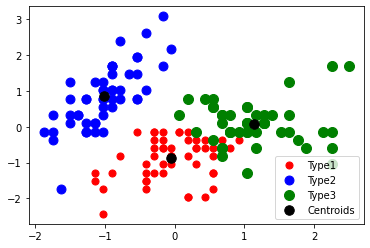

In [19]:
x = ir_z.iloc[:, [0, 1, 2, 3]].values 
plt.scatter(x[kmeans.labels_ == 0, 0], x[kmeans.labels_ == 0, 1], 
            s = 50, c = 'red', label = 'Type1')
plt.scatter(x[kmeans.labels_ == 1, 0], x[kmeans.labels_ == 1, 1], 
            s = 80, c = 'blue', label = 'Type2')
plt.scatter(x[kmeans.labels_ == 2, 0], x[kmeans.labels_ == 2, 1],
            s = 100, c = 'green', label = 'Type3')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], 
            s = 90, c = 'black', label = 'Centroids')

plt.legend()

#### 3D Visualization of K Means Clusters

In [20]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

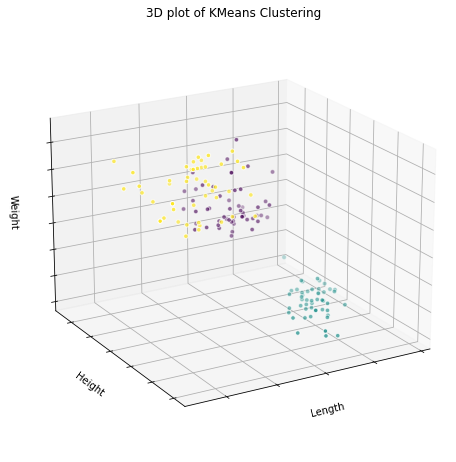

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(ir_z)
labels = kmeans.labels_
ax.scatter(ir_z.iloc[:, 0], ir_z.iloc[:, 1], ir_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='w')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

### Analyze the data using boxplot

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

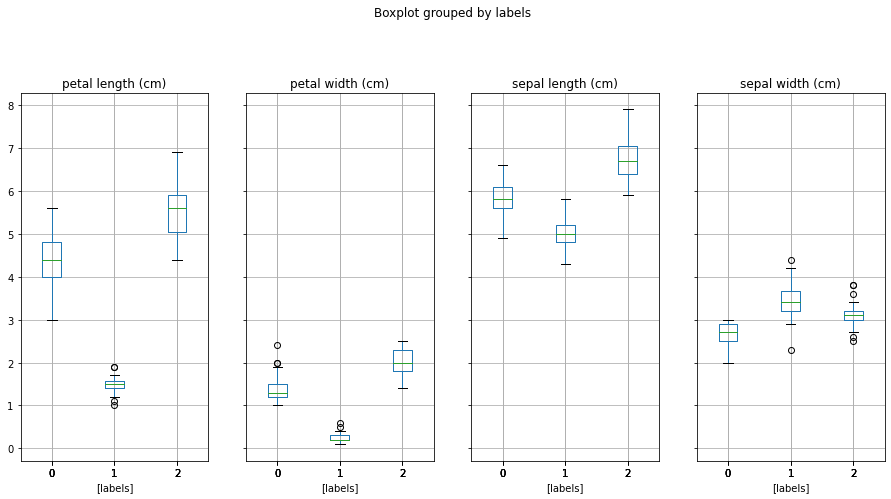

In [22]:
df_labeled.boxplot(by = 'labels', layout = (2,4), figsize = (15,15))

In [50]:
df_labeled.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.428000,1.462000,0.246000
2,6.780851,3.095745,5.510638,1.972340


## Hierarchical Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
himodel = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

In [25]:
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
ir_z.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [27]:
himodel.fit(ir_z)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [28]:
dfh_labels = pd.DataFrame(himodel.labels_ , columns = list(['labels']))
#df_labels['labels'] = df_labels['labels'].astype('category')

In [29]:
dfh_labeled = ir.join(dfh_labels)
dfh_labeled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [30]:
# No of values in a cluster
dfh_labeled['labels'].value_counts()

1    97
0    50
2     3
Name: labels, dtype: int64

#### Representation using Dendrogram 

In [33]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [34]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [35]:
link = linkage(ir_z, metric = 'euclidean', method = 'single')

In [36]:
c , c_dist = cophenet(link, pdist(ir_z))
c

0.830005031104444

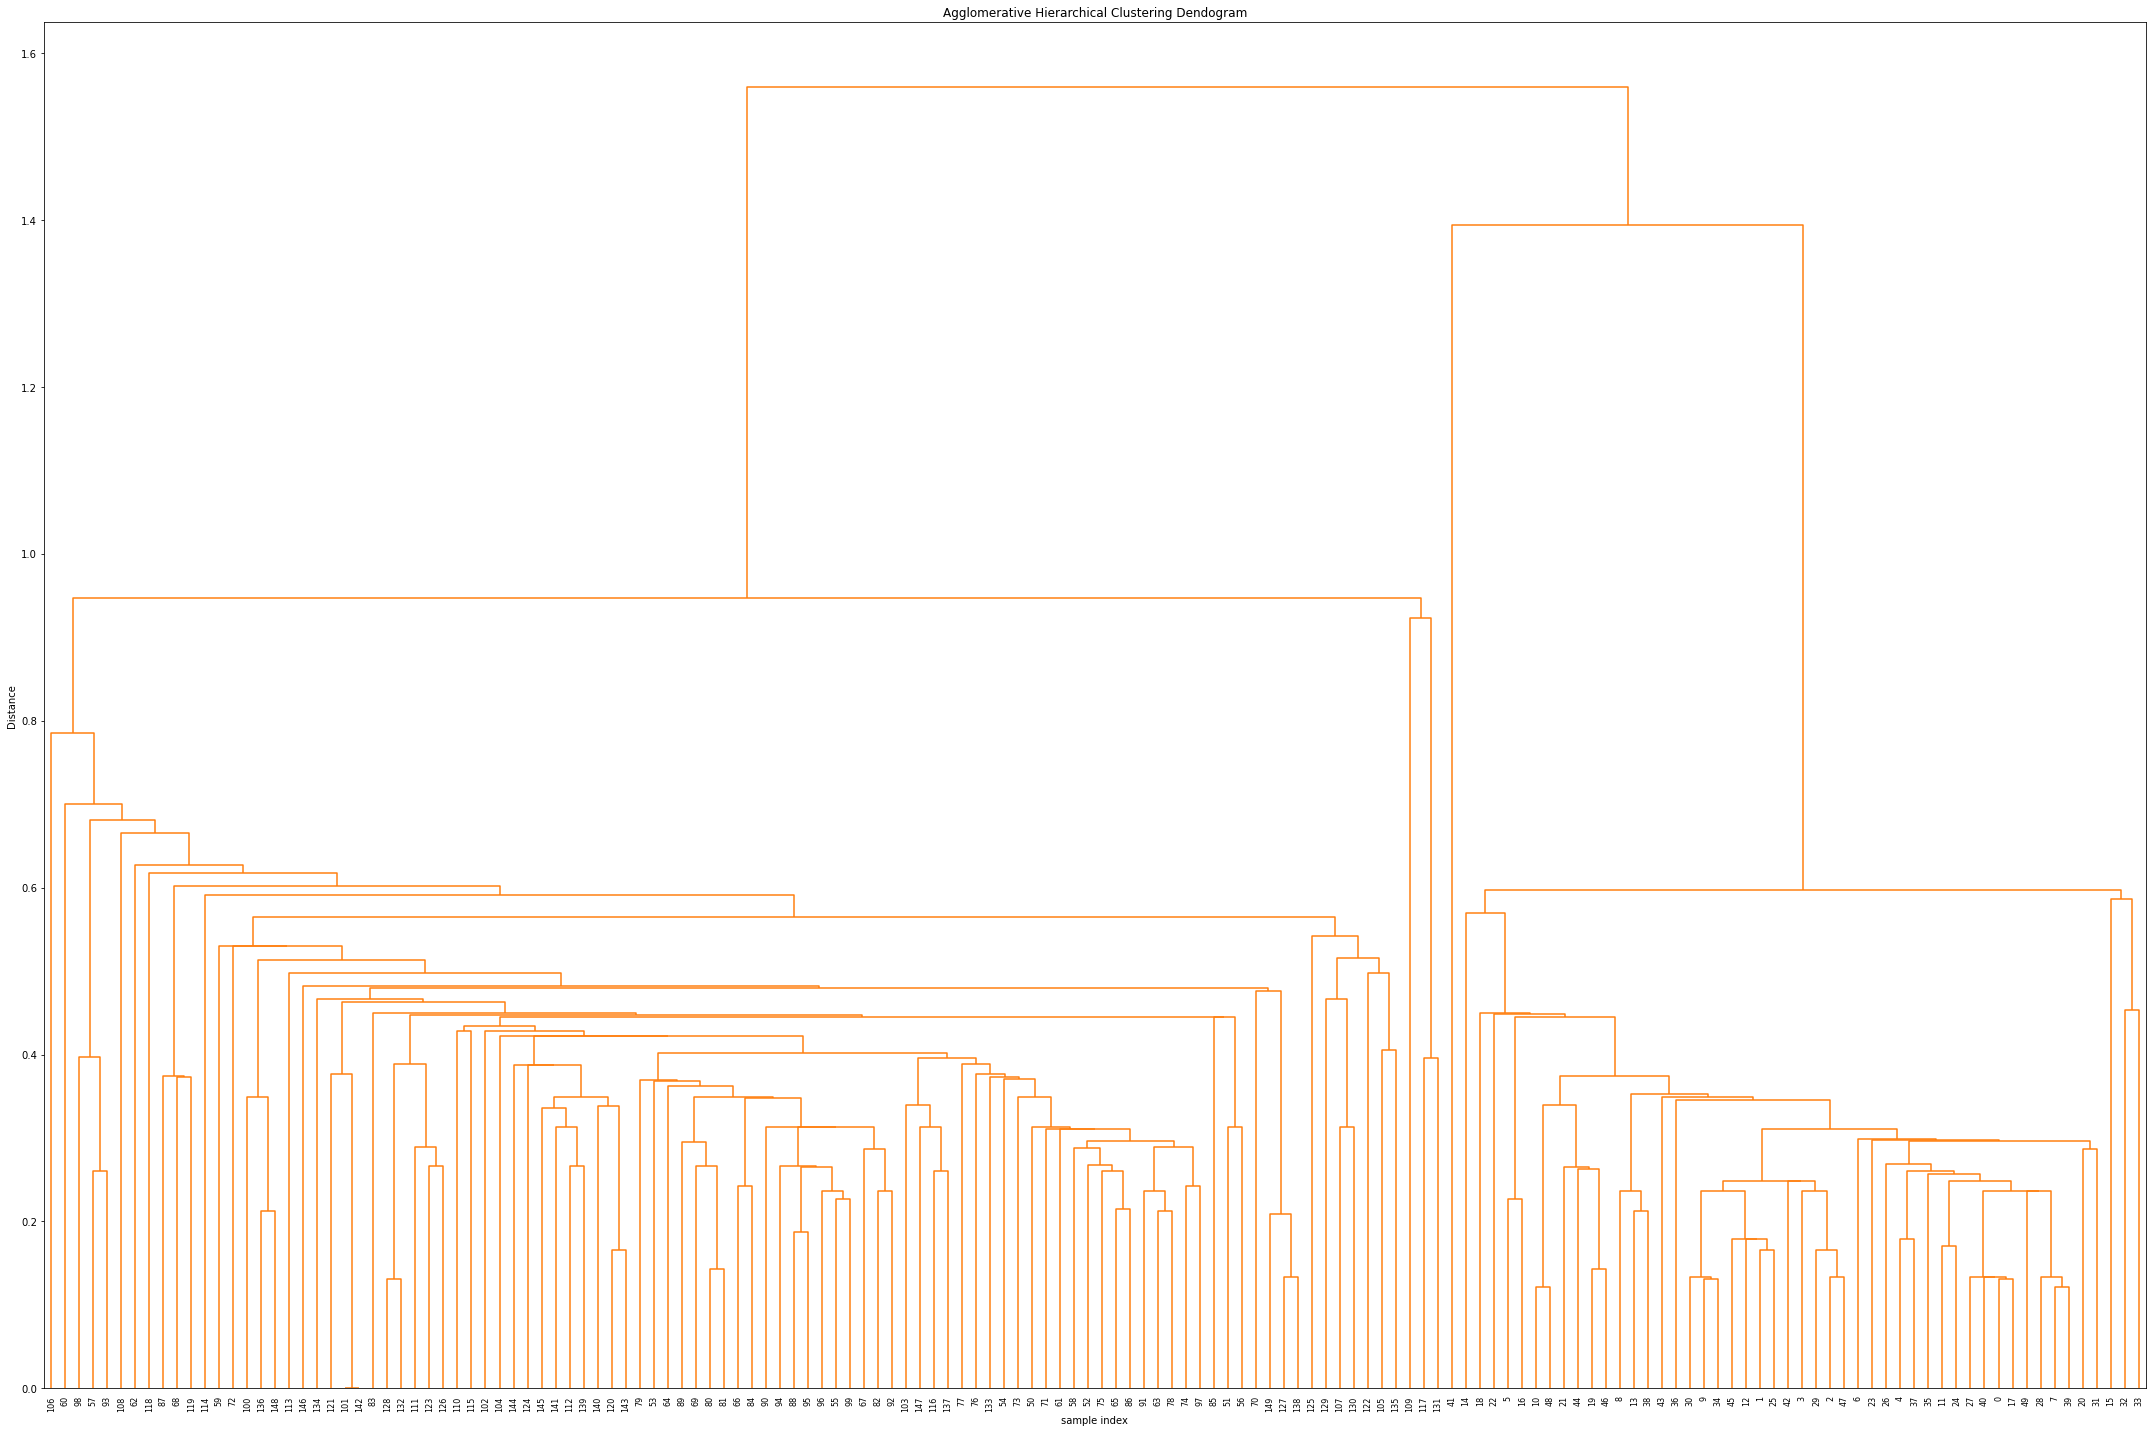

In [37]:
plt.figure(figsize=(30, 20))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [38]:
# Trying with different method
link = linkage(ir_z, metric = 'euclidean', method = 'complete')
c , c_dist = cophenet(link, pdist(ir_z))
print(c)

0.7514592238524538


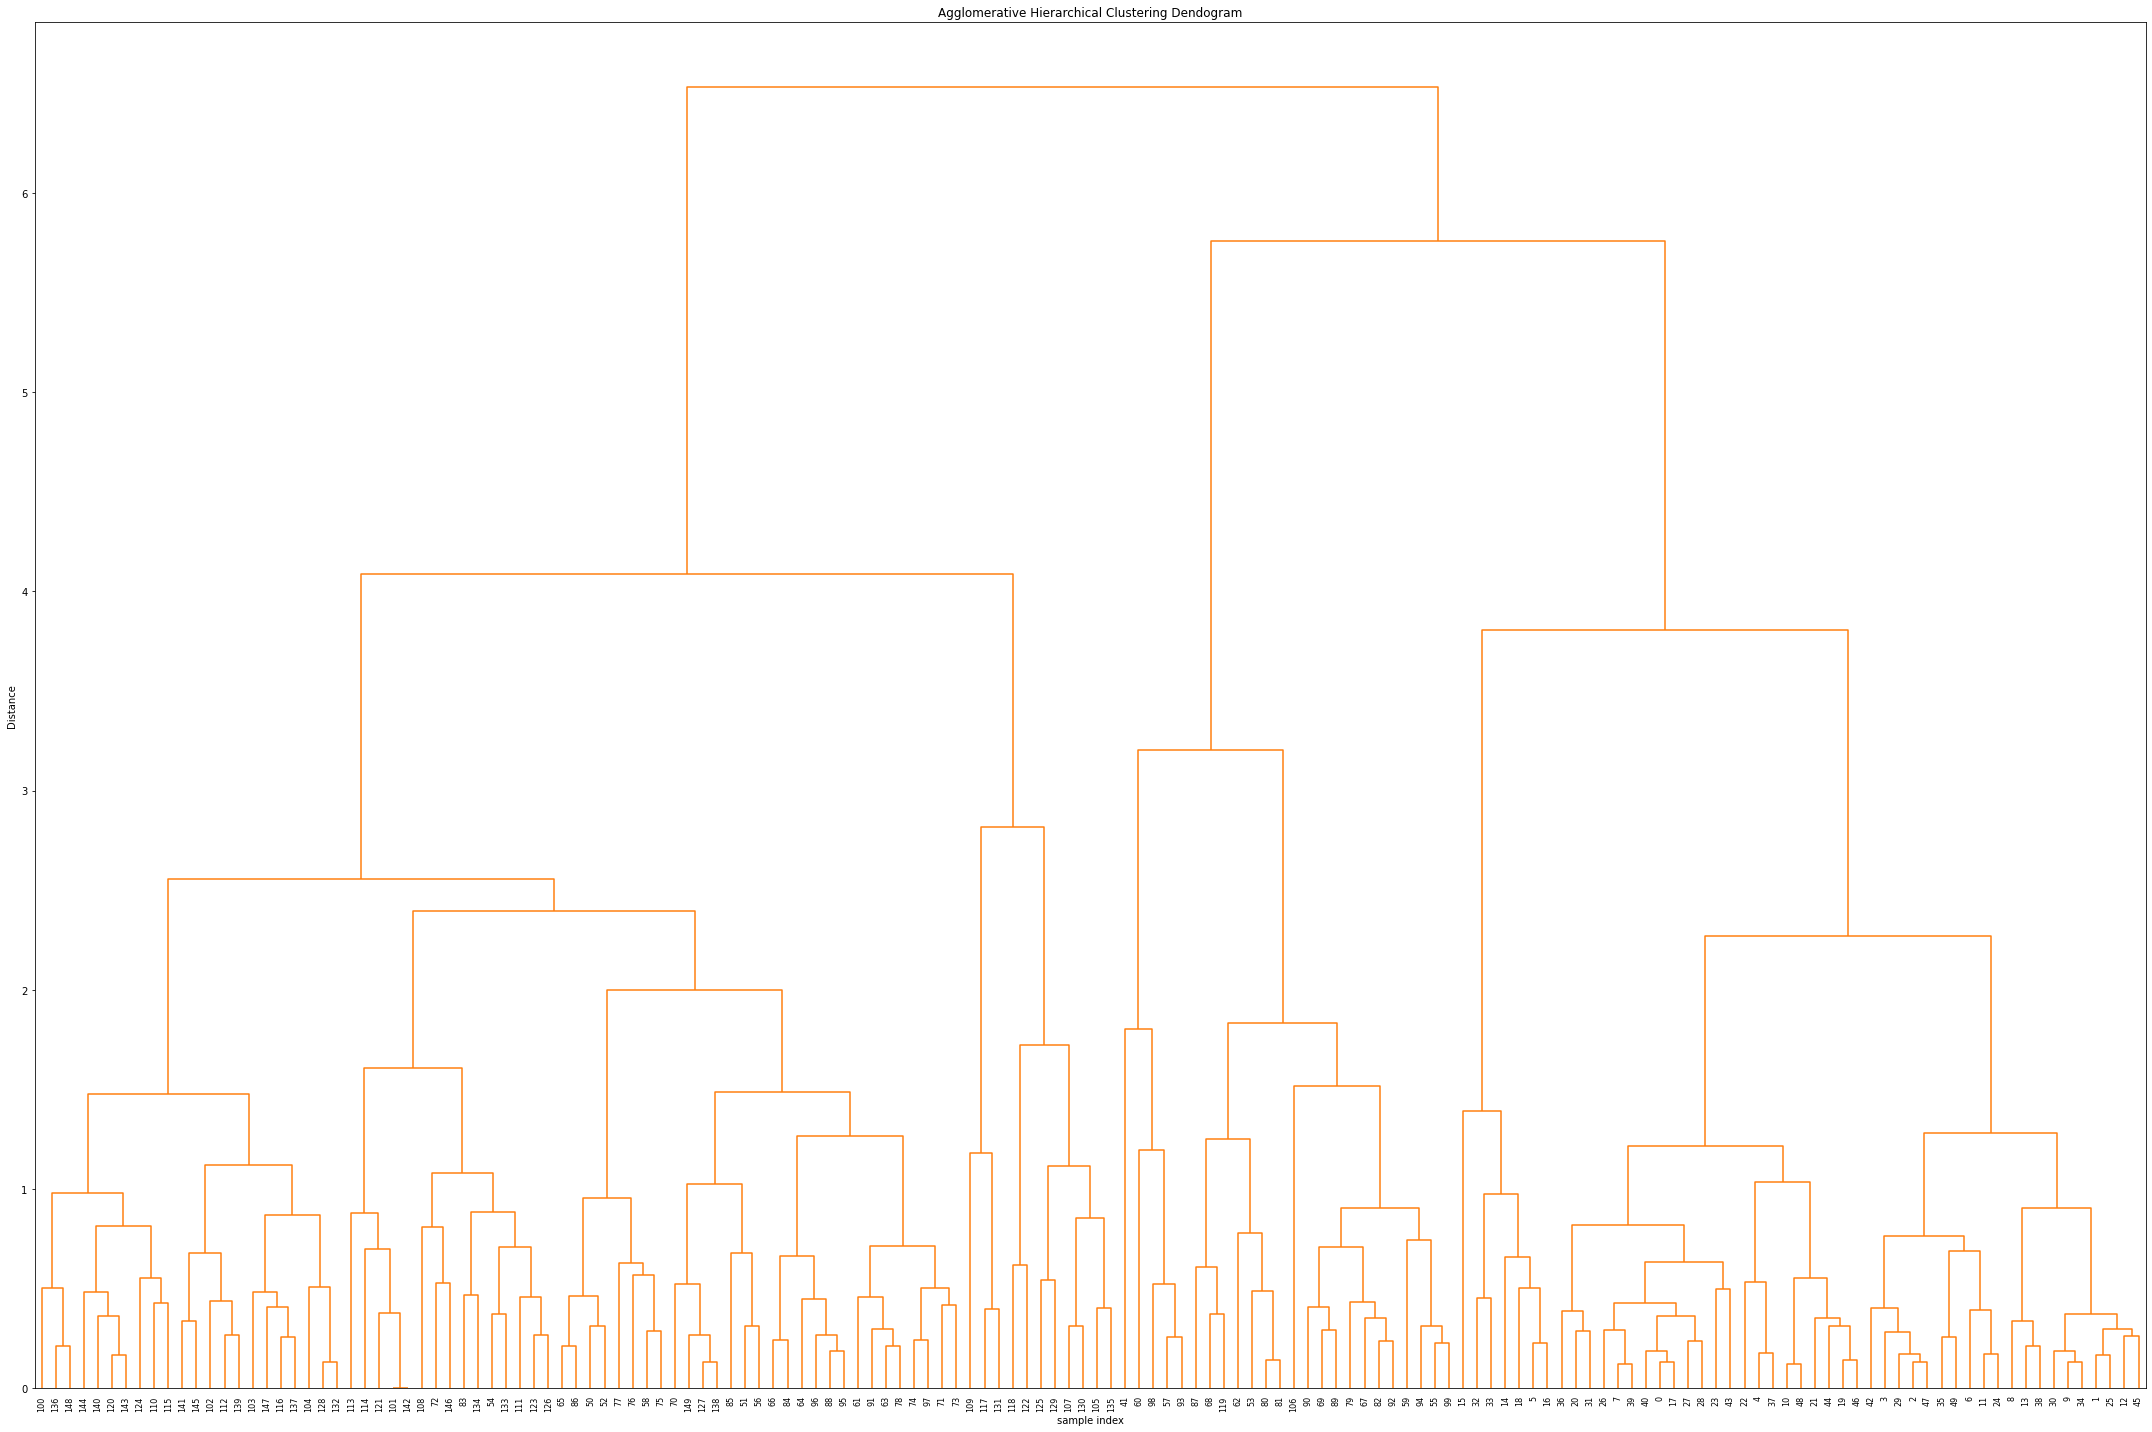

In [39]:
plt.figure(figsize=(30, 20))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [40]:
# 'average' method has high cophenet index than 'complete' method

In [41]:
# Trying with different method
link = linkage(ir_z, metric = 'euclidean', method = 'average')
c , c_dist = cophenet(link, pdist(ir_z))
print(c)

0.8543605621101564


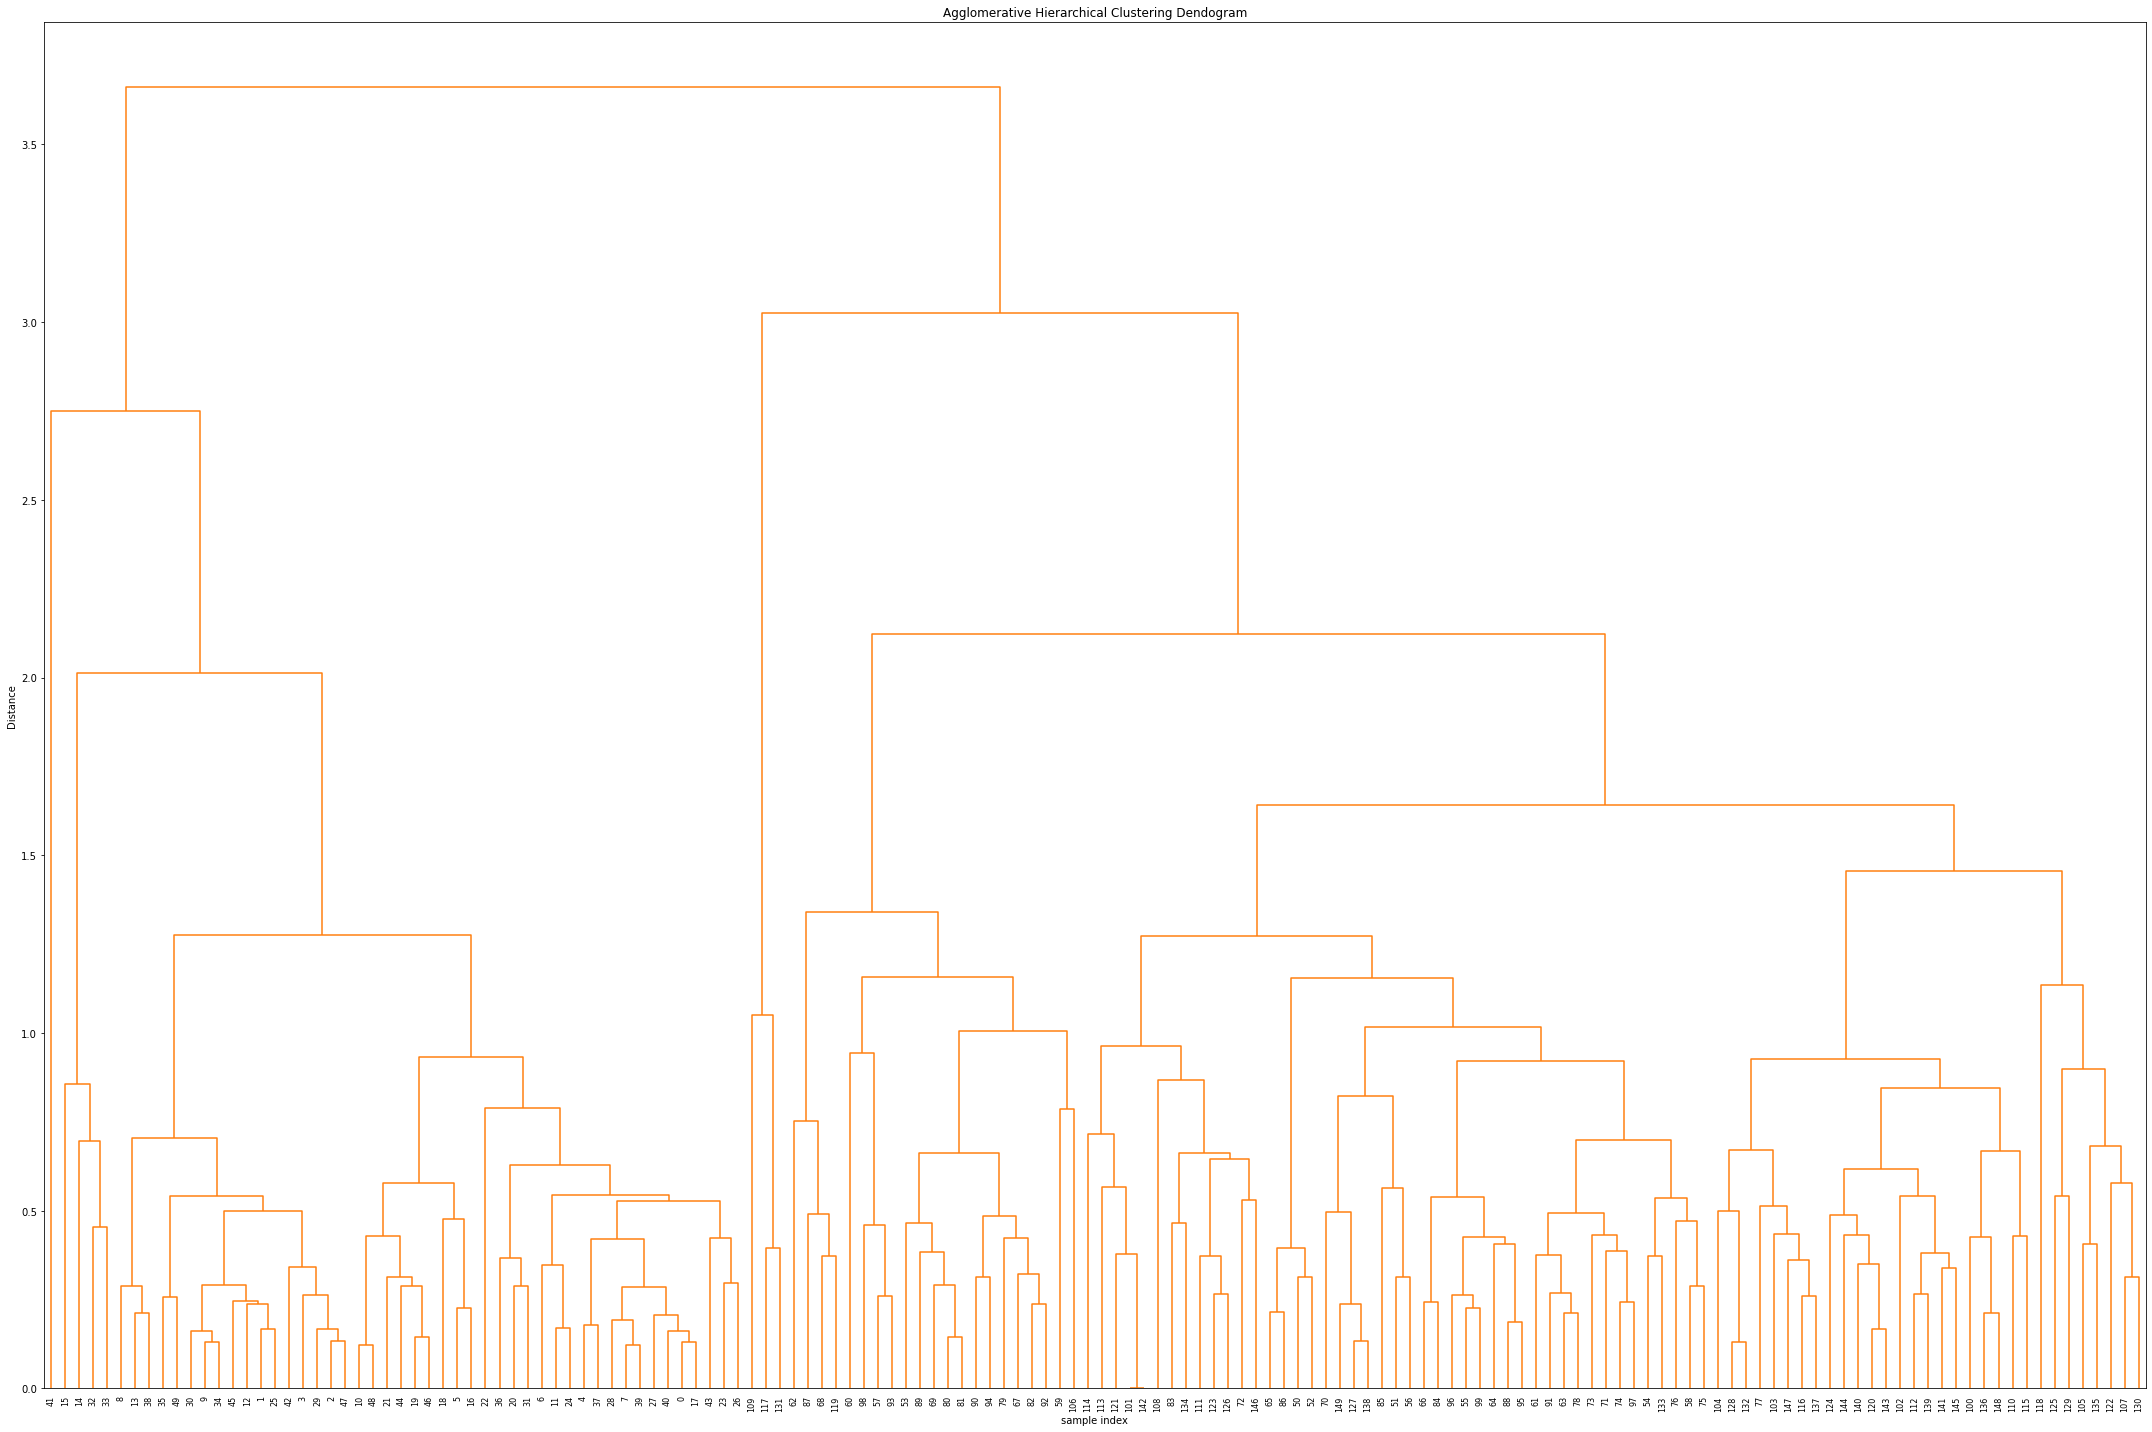

In [42]:
plt.figure(figsize=(30, 20))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

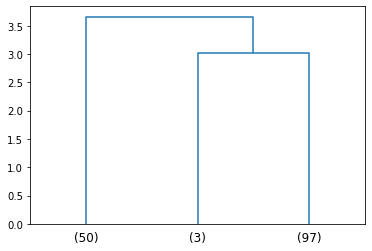

In [43]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [44]:
# Optimal distance between clusters for input in clustering = 0.5
maxD = 0.5

#### 2D visualization of hierarchical cluster

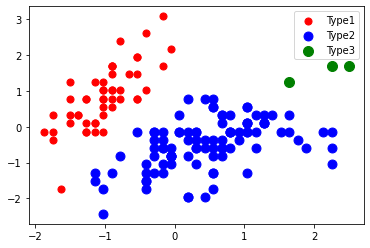

In [46]:
xh = ir_z.iloc[:, [0, 1, 2, 3]].values 
plt.scatter(xh[himodel.labels_ == 0, 0], xh[himodel.labels_ == 0, 1], 
            s = 50, c = 'red', label = 'Type1')
plt.scatter(xh[himodel.labels_ == 1, 0], xh[himodel.labels_ == 1, 1], 
            s = 80, c = 'blue', label = 'Type2')
plt.scatter(xh[himodel.labels_ == 2, 0], xh[himodel.labels_ == 2, 1],
            s = 100, c = 'green', label = 'Type3')

plt.legend()

#### 3D Visualization of Hierarchical Cluster

Text(0.5, 0.92, '3D plot of Hierarchical Clustering')

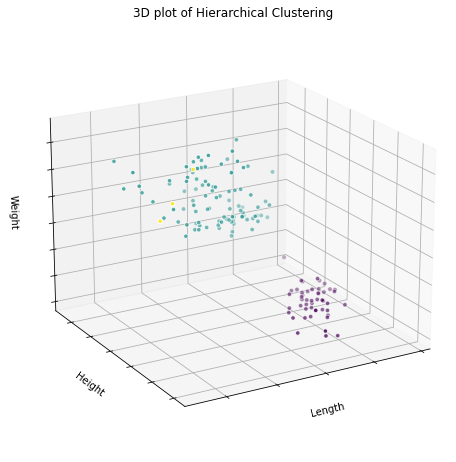

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
himodel.fit(ir_z)
labels = himodel.labels_
ax.scatter(ir_z.iloc[:, 0], ir_z.iloc[:, 1], ir_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='w')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of Hierarchical Clustering')

### Analyze the data using Box Plot

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

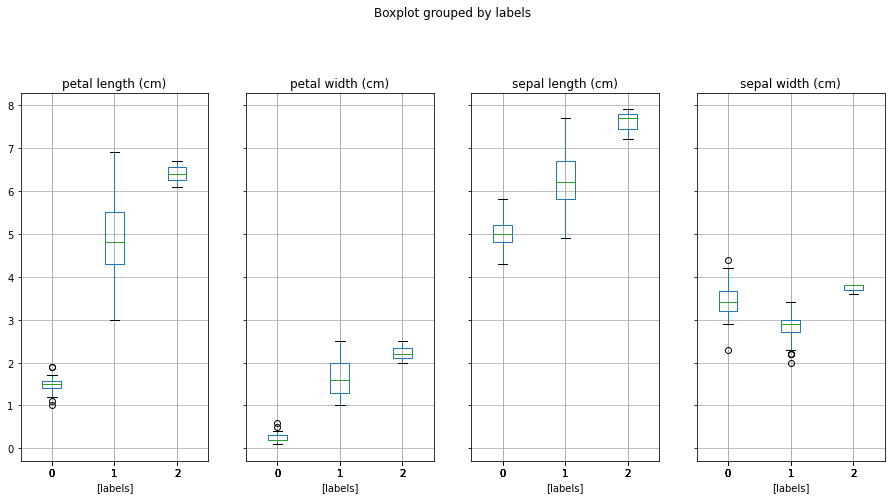

In [49]:
dfh_labeled.boxplot(by = 'labels', layout = (2,4), figsize = (15,15))

In [51]:
dfh_labeled.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.220619,2.845361,4.859794,1.658763
2,7.600000,3.733333,6.400000,2.233333
